# DS 542 - Spring 2026 - Discussion 4

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/DL4DS/fa2026_discussions/blob/main/discussion_04.ipynb)

In this discussion notebook, you will practice using PyTorch's frameworks for repeatable data management and reusable model designs.
You will also track gradient statistics during the fitting process.

When you are done writing code, make sure to run all the cells and then submit your notebook in Gradescope.


## Demo 1 - Creating a data loader

In this demo, we will create a data loader for the Iris Flower Dataset, a classic machine learning dataset used for classification. It contains measurements of sepal and petal length and width for three species of iris flowers (setosa, versicolor, virginica). Our goal is to load this data from GitHub, convert it into tensors, and use PyTorch's DataLoader for efficient batching and training.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
# Read the Iris dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
iris_df = pd.read_csv(url)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can create a dataloader for this data set, separating our features and our target. Our target column for this dataset is "species".

In [3]:
class IrisDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):

        # Convert species to classes
        self.label_map = {
            "setosa": 0,
            "versicolor": 1,
            "virginica": 2
        }

        dataframe = dataframe.copy()
        dataframe["species"] = dataframe["species"].map(self.label_map)

        # Features (remove target column)
        self.data = dataframe.drop(columns=["species"]).values.astype(float)

        # Targets
        self.targets = dataframe["species"].values.astype(int)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        # Convert to tensors
        x = torch.tensor(self.data[idx], dtype=torch.float32)
        y = torch.tensor(self.targets[idx], dtype=torch.long)

        return x, y

Now, we create a dataset object using our dataframe

In [4]:
from torch.utils.data import DataLoader

iris_dataset = IrisDataset(iris_df)

iris_dataloader = DataLoader(
    iris_dataset,
    batch_size=16,
    shuffle=True
)

In [5]:
# DO NOT CHANGE

for batch_input, batch_output in iris_dataloader:
    print("INPUT", batch_input)
    print("OUTPUT", batch_output)
    break

INPUT tensor([[5.8000, 2.6000, 4.0000, 1.2000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.8000, 1.6000, 0.2000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [5.0000, 3.5000, 1.3000, 0.3000],
        [4.9000, 2.4000, 3.3000, 1.0000],
        [5.5000, 2.4000, 3.7000, 1.0000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [5.0000, 3.5000, 1.6000, 0.6000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [5.5000, 3.5000, 1.3000, 0.2000],
        [5.0000, 3.4000, 1.5000, 0.2000]])
OUTPUT tensor([1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0])


## Problem 1 - Setup Dataset and DataLoader Objects

PyTorch provides various utilities to help managing large data sets.
In this problem, you will implement `Dataset` and `DataLoader` objects for the Pima Indians Diabetes data set.
This data set is small and easily fits in memory, but these objects will also help with randomization and batching for stochastic gradient descent.


Here is a link to PyTorch's [Datasets & DataLoaders tutorial](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [6]:
df = pd.read_csv("https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/raw/refs/heads/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
len(df)

768

Finish the implementation of the `DiabetesDataset` class below by implementing the missing methods for `torch.utils.data.Dataset`.
The dataset should return pairs of tensors where the first tensor is the input row and the second tensor has the corresponding `Outcome` target.

In [19]:
# TODO: Create init function with "Outcome" as the target
# Return the length of the data in the __len__ function
# Convert data and targets to tensors by creating a __getitem__ function

class DiabetesDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe):
        self.data = dataframe.drop(columns=["Outcome"]).astype(float) # Specify our features
        self.target = dataframe["Outcome"].values.astype(int)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Convert features and target to tensors
        x = torch.tensor(self.data.iloc[idx].values, dtype=torch.float32)
        y = torch.tensor(self.target[idx], dtype=torch.long)
        return x, y

Create a DataLoader object using an instance of your `DiabetesDataset` class and configure it to randomize the data and return batches of 100 rows at a time.

In [20]:
# YOUR CHANGES HERE

from torch.utils.data import DataLoader

dataset = DiabetesDataset(df) # Hint: Use our dataframe to create the dataset object

dataloader = DataLoader(
    dataset,
    batch_size=100,
    shuffle=True
)

Test your data loader.

In [21]:
# DO NOT CHANGE

for batch_input, batch_output in dataloader:
    print("INPUT", batch_input)
    print("OUTPUT", batch_output)
    break

INPUT tensor([[4.0000e+00, 1.3700e+02, 8.4000e+01, 0.0000e+00, 0.0000e+00, 3.1200e+01,
         2.5200e-01, 3.0000e+01],
        [8.0000e+00, 8.4000e+01, 7.4000e+01, 3.1000e+01, 0.0000e+00, 3.8300e+01,
         4.5700e-01, 3.9000e+01],
        [1.0000e+01, 1.1500e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.5300e+01,
         1.3400e-01, 2.9000e+01],
        [4.0000e+00, 1.1000e+02, 9.2000e+01, 0.0000e+00, 0.0000e+00, 3.7600e+01,
         1.9100e-01, 3.0000e+01],
        [1.0000e+00, 1.9300e+02, 5.0000e+01, 1.6000e+01, 3.7500e+02, 2.5900e+01,
         6.5500e-01, 2.4000e+01],
        [2.0000e+00, 8.7000e+01, 5.8000e+01, 1.6000e+01, 5.2000e+01, 3.2700e+01,
         1.6600e-01, 2.5000e+01],
        [1.0000e+00, 1.1100e+02, 8.6000e+01, 1.9000e+01, 0.0000e+00, 3.0100e+01,
         1.4300e-01, 2.3000e+01],
        [6.0000e+00, 1.1900e+02, 5.0000e+01, 2.2000e+01, 1.7600e+02, 2.7100e+01,
         1.3180e+00, 3.3000e+01],
        [4.0000e+00, 1.8400e+02, 7.8000e+01, 3.9000e+01, 2.7700e+02, 3.700

## Demo 2 - Using the Adam Optimizer

The **Adam** optimizer is an adaptive optimization method that adjusts learning rates for each parameter using past gradients and momentum, making training faster and more stable than standard gradient descent.

In this use case, Adam updates the weight matrix and bias using gradients from CrossEntropyLoss, helping the model learn good class boundaries.

On the Iris dataset, Adam is used to train a linear model with four input features and three output classes, efficiently learning to separate the three flower species.

In [22]:
import torch.nn as nn

class MulticlassLogisticRegression(nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        # Weights: (features × classes)
        self.weights = nn.Parameter(
            torch.zeros(num_features, num_classes)
        )

        # Bias: (classes,)
        self.bias = nn.Parameter(
            torch.zeros(num_classes)
        )

    def forward(self, x):
        # Linear scores (logits)
        logits = x @ self.weights + self.bias

        # Softmax for multiclass probabilities
        return torch.softmax(logits, dim=1)


In [23]:
model = MulticlassLogisticRegression(num_features = 4, num_classes = 3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
num_epochs = 1000

for epoch in range(num_epochs):
    epoch_loss = 0.0
    num_batches = 0

    for batch_inputs, batch_targets in iris_dataloader:
        batch_targets = batch_targets.long()

        outputs = model(batch_inputs)
        loss = torch.nn.CrossEntropyLoss()(outputs, batch_targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    if epoch % 100 == 0:
      print(f"Epoch {epoch}/{num_epochs}, Average Loss: {avg_loss:.4f}")


Epoch 0/1000, Average Loss: 1.0726
Epoch 100/1000, Average Loss: 0.6428
Epoch 200/1000, Average Loss: 0.6162
Epoch 300/1000, Average Loss: 0.5958
Epoch 400/1000, Average Loss: 0.5928
Epoch 500/1000, Average Loss: 0.5848
Epoch 600/1000, Average Loss: 0.5832
Epoch 700/1000, Average Loss: 0.5814
Epoch 800/1000, Average Loss: 0.5799
Epoch 900/1000, Average Loss: 0.5785


## Problem 2 - Use Adam to Optimize Logistic Regression

Write a training loop using PyTorch's [`torch.optim.Adam`](https://docs.pytorch.org/docs/stable/generated/torch.optim.Adam.html) to optimize logistic regression.
Use the following `LogisticRegression` class for the implementation of logistic regression and [`torch.nn.functional.binary_cross_entropy`](https://docs.pytorch.org/docs/stable/generated/torch.nn.functional.binary_cross_entropy.html) for the loss function.

Run the training loop for 10 epochs printing the average training batch loss for each epoch.

In [24]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # use torch.nn.Parameter to register these as model parameters
        self.weights = torch.nn.Parameter(torch.zeros(len(df.columns)-1, 1))
        self.bias = torch.nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return torch.sigmoid(x @ self.weights + self.bias)

In [35]:
# YOUR CHANGES HERE


model = MulticlassLogisticRegression(num_features=4, num_classes=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
accuracies = []
weight_grads = []
bias_grads = []

for epoch in range(10):
    for batch_inputs, batch_targets in iris_dataloader:
        outputs = model(batch_inputs)
        loss = torch.nn.CrossEntropyLoss()(outputs, batch_targets)

        optimizer.zero_grad()
        loss.backward()

        losses.append(loss.item())
        preds = outputs.argmax(dim=1)
        accuracies.append((preds == batch_targets).float())
        weight_grads.append(model.weights.grad)
        bias_grads.append(model.bias.grad)

        optimizer.step()
        epoch_loss += loss.item()
        num_batches += 1

    avg_loss = epoch_loss / num_batches
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")


Epoch 1/1000, Average Loss: 0.7265
Epoch 2/1000, Average Loss: 0.7295
Epoch 3/1000, Average Loss: 0.7319
Epoch 4/1000, Average Loss: 0.7339
Epoch 5/1000, Average Loss: 0.7355
Epoch 6/1000, Average Loss: 0.7370
Epoch 7/1000, Average Loss: 0.7382
Epoch 8/1000, Average Loss: 0.7392
Epoch 9/1000, Average Loss: 0.7401
Epoch 10/1000, Average Loss: 0.7411


## Problem 3 - Track Training Statistics and Gradients

Copy your training loop from problem 2 and modify it as follows.

1. Increase the number of epochs to 100.
2. Track the training loss of each batch.
3. Track the training accuracy of each batch.
4. Track the loss gradient of each batch for both the weights and bias of the logistic regression.
5. After the training loop is done, plot the data from 2-4. Use Matplotlib's subplot function to stack the charts vertically so they are aligned.

In [33]:
# YOUR CHANGES HERE

# TODO: Define model and optimizer

model = MulticlassLogisticRegression(num_features=4, num_classes=3)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

losses = []
accuracies = []
weight_grads = []
bias_grads = []

for epoch in range(100):
    for batch_inputs, batch_targets in iris_dataloader:
        outputs = model(batch_inputs)
        loss = torch.nn.CrossEntropyLoss()(outputs, batch_targets)

        optimizer.zero_grad()
        loss.backward()

        losses.append(loss.item())
        preds = outputs.argmax(dim=1)
        accuracies.append((preds == batch_targets).float())
        weight_grads.append(model.weights.grad)
        bias_grads.append(model.bias.grad)

        optimizer.step()

weight_grads = np.array(weight_grads)
bias_grads = np.array(bias_grads).flatten()

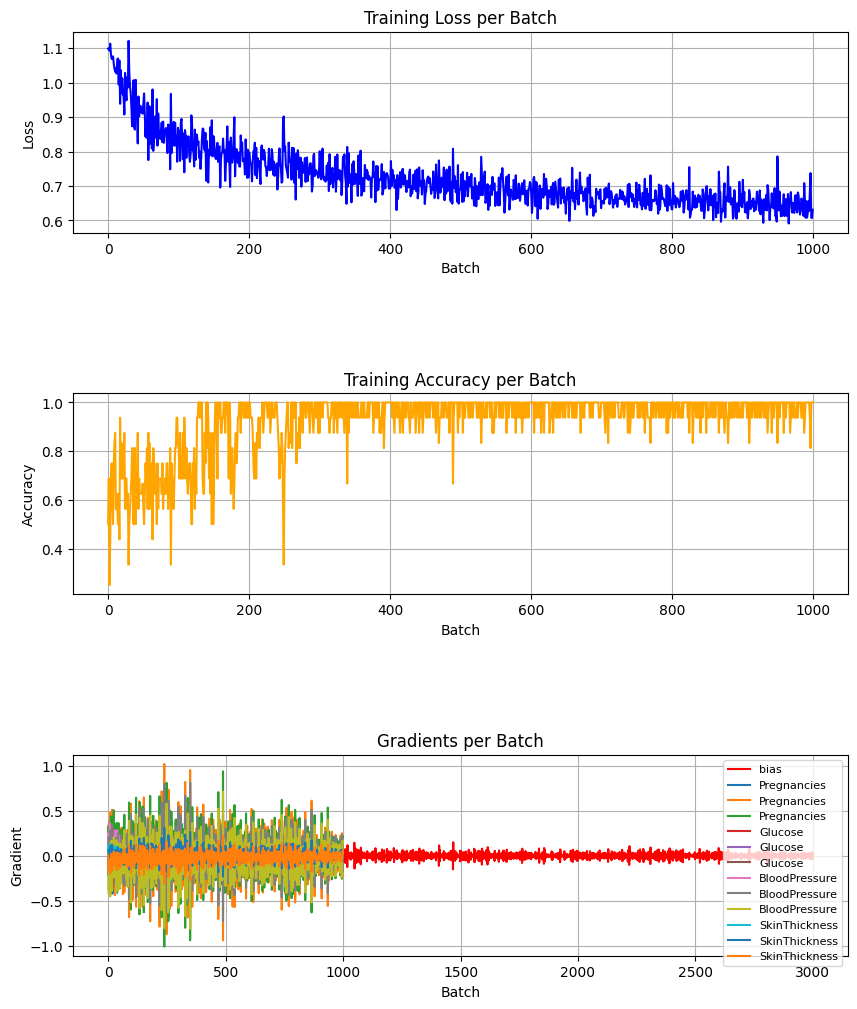

In [31]:
# YOUR CHANGES HERE

plt.figure(figsize=(10, 12))

# 1. Training Loss
plt.subplot(3, 1, 1)
plt.plot(losses, color='blue') # Loss array
plt.title("Training Loss per Batch")
plt.xlabel("Batch")
plt.ylabel("Loss") # Label
plt.grid(True)

# 2. Training Accuracy
plt.subplot(3, 1, 2)
plt.plot(accuracies, color='orange') # Accuracy array
plt.title("Training Accuracy per Batch")
plt.xlabel("Batch")
plt.ylabel("Accuracy") # Label
plt.grid(True)

# 3. Gradients
plt.subplot(3, 1, 3)
plt.plot(bias_grads, label="bias", color='red') # Bias array
for i in range(weight_grads.shape[1]): # Weight array
    plt.plot(weight_grads[:, i], label=f"{df.columns[i]}") # Weight array
plt.title("Gradients per Batch")
plt.xlabel("Batch")
plt.ylabel("Gradient") # Label
plt.legend(fontsize=8)
plt.grid(True)

plt.subplots_adjust(hspace=0.8)
plt.show()